## Project Three: Three Body System

Initial Condition
    1. Two Stationary Stars and One Body Introduced
        init_state: Star1_p = (-100, 0) v = (0, 0)
                    Star2_p = (100, 0)  v = (0, 0)
                    Planet_p = (50, 50) v = (0, -50) 
                    
        
    2. Two Stationary Stars and Two Bodies Introduced with pretty much the same condition(chaos)
    
    3. Binary Star System with Two Bodies Introduced
    
    Mass of Sun: 2 * 10^30 kg (2 kg)
    Mass of Earth: 6 * 10^24 kg (.02kg)
    G constant: 6.67*10^-11
    
   
    binary star orbits: https://en.wikipedia.org/wiki/Habitability_of_binary_star_systems
    wired article: https://www.wired.com/2016/06/way-solve-three-body-problem/
    

In [1]:
%matplotlib notebook
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

In [3]:
condition = Condition(#m_s1 = 2,
                      m_s1 = 2 * 10**6,
                      m_s2 = 2 * 10**6,
                      m_p1 = 6,
                      G = 6.67*10**-2,
                    #726 max run time without collision correction
                      duration = 5000,
                    #Minimun dt of 0.001 to be accurate
                      dt = 0.001)

In [4]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # make the initial state
    init = State(x_s1=-100, y_s1=0, x_s2=100, y_s2=0, x_p1=50, y_p1=50, vx_s1=0, vy_s1=0, vx_s2=0, vy_s2=0, vx_p1=0, vy_p1=-65)
    
    # compute timestamps
    ts = linrange(0, duration, dt)
    
    return System(init=init, G = G, m_s1 = m_s1, m_s2 = m_s2, m_p1 = m_p1, ts=ts, dt_delta = dt, m_pnew = 0, nevermores1 = 0, nevermores2 = 0)

In [5]:
system = make_system(condition)

In [6]:
def slope_func_1(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
 n  m    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x_s1, y_s1, x_s2, y_s2, x_p1, y_p1, vx_s1, vy_s1, vx_s2, vy_s2, vx_p1, vy_p1 = state
    unpack(system)
    
    pos_p1 = Vector(x_p1, y_p1)
    v_p1 = Vector(vx_p1, vy_p1)
    pos_s1 = Vector(x_s1, y_s1)
    pos_s2 = Vector(x_s2, y_s2)
    
    distance_p1s1 = pos_s1 - pos_p1
    distance_p1s2 = pos_s2 - pos_p1
    
    F_p1s1 = (G * m_s1 * m_p1 / (distance_p1s1.mag**2)) * distance_p1s1.hat()
    F_p1s2 = (G * m_s2 * m_p1 / (distance_p1s2.mag**2)) * distance_p1s2.hat()
    
    a_p1s1 = F_p1s1 / m_p1
    a_p1s2 = F_p1s2 / m_p1
    a = a_p1s1 + a_p1s2
    #print(a)
    a = Vector(a)
    #print(type(a))
    
    p_present = v_p1 * m_p1
    p_p1s1 = F_p1s1 * dt_delta
    p_p1s2 = F_p1s2 * dt_delta
    p_total = p_present+p_p1s1+p_p1s2
    
    v_p1 = p_total / m_p1
    v_p1 = Vector(v_p1)
    
    #Use positions to find force acting on the planet, use the force to find momentum and acceleration, and then 
    #velocity from momentum. Return velocity and acceleration.
    
    return 0, 0, 0, 0, v_p1.x, v_p1.y, 0, 0, 0, 0, a.x, a.y

In [7]:
slope_func_1(system.init, 0, system)

(0,
 0,
 0,
 0,
 <Quantity(0.013803434843659547, 'dimensionless')>,
 <Quantity(-65.02055300028152, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(13.803434843659549, 'dimensionless')>,
 <Quantity(-20.553000281522934, 'dimensionless')>)

In [8]:
def slope_func_inelastic(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
 n  m    t: time
    system: System object containing g, rho,
            C_d, area, and mass
    
    returns: derivatives of y and v
    """
    x_s1, y_s1, x_s2, y_s2, x_p1, y_p1, vx_s1, vy_s1, vx_s2, vy_s2, vx_p1, vy_p1 = state
    unpack(system)
    m_pnew = system.m_pnew
    nevermores1 = system.nevermores1
    nevermores2 = system.nevermores2
    
    pos_p1 = Vector(x_p1, y_p1)
    v_p1 = Vector(vx_p1, vy_p1)
    pos_s1 = Vector(x_s1, y_s1)
    pos_s2 = Vector(x_s2, y_s2)
    
    if ((x_p1 - x_s1)**2 + (y_p1 - y_s1)**2) < (10**2) and nevermores1 == 0:
        print("collision between planet and sun1")
        distance_p1s1 = pos_s1 - pos_s1 #zero vector
        system.nevermores1 = 1
        print(distance_p1s1)
        
    else:
        distance_p1s1 = pos_s1 - pos_p1
        F_p1s1 = (G * m_s1 * (m_p1 + m_pnew) / (distance_p1s1.mag**2)) * distance_p1s1.hat()
        

    if ((x_p1 - x_s2)**2 + (y_p1 - y_s2)**2) < (10**2) and nevermores2 == 0:
        print("collision between planet and sun2")
        system.nevermores2 = 1
        v_p1 = v_p1 * (m_p1 / (m_p1 + m_s2))
        system.m_pnew  = m_s2
        F_p1s2 = Vector(0,0)
    else:
        if nevermores2 == 0:
            distance_p1s2 = pos_s2 - pos_p1
            F_p1s2 = (G * m_s2 * (m_p1 + m_pnew) / (distance_p1s2.mag**2)) * distance_p1s2.hat()
        else:
            F_p1s2 = Vector(0,0)
    
    a_p1s1 = F_p1s1 / (m_p1 + m_pnew)
    a_p1s2 = F_p1s2 / (m_p1 + m_pnew)
    a = a_p1s1 + a_p1s2
    #print(a)
    a = Vector(a)
    #print(type(a))
    
    p_present = v_p1 * (m_p1 + m_pnew)
    p_p1s1 = F_p1s1 * dt_delta
    p_p1s2 = F_p1s2 * dt_delta
    p_total = p_present+p_p1s1+p_p1s2
    
    v_p1 = p_total / (m_p1 + m_pnew)
    v_p1 = Vector(v_p1)
    
    print(v_p1)
    
    #Use positions to find force acting on the planet, use the force to find momentum and acceleration, and then 
    #velocity from momentum. Return velocity and acceleration.
    
    return 0, 0, 0, 0, v_p1.x, v_p1.y, 0, 0, 0, 0, a.x, a.y

In [9]:
slope_func_inelastic(system.init, 0, system)

[  1.38034348e-02  -6.50205530e+01] dimensionless


(0,
 0,
 0,
 0,
 <Quantity(0.013803434843659547, 'dimensionless')>,
 <Quantity(-65.02055300028152, 'dimensionless')>,
 0,
 0,
 0,
 0,
 <Quantity(13.803434843659549, 'dimensionless')>,
 <Quantity(-20.553000281522934, 'dimensionless')>)

In [10]:
system = make_system(condition)
run_odeint(system, slope_func_1)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [11]:
system = make_system(condition)
run_odeint(system, slope_func_inelastic)

[  1.38034348e-02  -6.50205530e+01] dimensionless
[  1.38034348e-02  -6.50205530e+01] dimensionless
[  1.38051239e-02  -6.50205555e+01] dimensionless
[  1.38051239e-02  -6.50205555e+01] dimensionless
[  1.38068130e-02  -6.50205580e+01] dimensionless
[  1.38068130e-02  -6.50205580e+01] dimensionless
[  2.61994918e-02  -6.50389571e+01] dimensionless
[  2.61995075e-02  -6.50389571e+01] dimensionless
[  3.86201722e-02  -6.50573648e+01] dimensionless
[  3.86202036e-02  -6.50573648e+01] dimensionless
[  5.10689329e-02  -6.50757811e+01] dimensionless
[  5.10689643e-02  -6.50757811e+01] dimensionless
[  0.11548168 -65.17054783] dimensionless
[  0.11548204 -65.17054776] dimensionless
[  0.09452468 -65.13981066] dimensionless
[  0.09452484 -65.13981063] dimensionless
[  5.97329089e-02  -6.50885787e+01] dimensionless
[  5.97329153e-02  -6.50885787e+01] dimensionless
[  0.06841047 -65.10138054] dimensionless
[  0.06841046 -65.10138054] dimensionless
[  0.07710162 -65.11418646] dimensionless
[  0.0

[ 38.31378693  -1.10465347] dimensionless
[ 37.67297036  -0.70511317] dimensionless
[ 37.67297022  -0.70511337] dimensionless
[ 37.05134188  -0.32894678] dimensionless
[ 37.05134178  -0.32894693] dimensionless
[  3.64478726e+01   2.58173961e-02] dimensionless
[  3.64478725e+01   2.58172760e-02] dimensionless
[ 35.86159952   0.36093565] dimensionless
[ 35.86159947   0.36093556] dimensionless
[ 35.2916224    0.67797738] dimensionless
[ 35.29162236   0.6779773 ] dimensionless
[ 34.73709943   0.97834903] dimensionless
[ 34.73709941   0.97834897] dimensionless
[ 34.19724361   1.26331453] dimensionless
[ 34.19724359   1.26331449] dimensionless
[ 33.67131893   1.53401277] dimensionless
[ 33.67131892   1.53401273] dimensionless
[ 33.03531466   1.85247188] dimensionless
[ 33.03531464   1.85247182] dimensionless
[ 32.41858534   2.15220147] dimensionless
[ 32.4185853    2.15220131] dimensionless
[ 31.81999488   2.43477572] dimensionless
[ 31.81999486   2.43477561] dimensionless
[ 31.23849487   2.

[  0.85005218  59.05250152] dimensionless
[  0.93760992  58.49119381] dimensionless
[  0.93760985  58.49119362] dimensionless
[  1.0181399   57.91995361] dimensionless
[  1.01813984  57.9199535 ] dimensionless
[  1.09203214  57.34137627] dimensionless
[  1.09203208  57.34137622] dimensionless
[  1.1715385   56.64955712] dimensionless
[  1.17153843  56.64955713] dimensionless
[  1.24294933  55.954136  ] dimensionless
[  1.24294927  55.95413609] dimensionless
[  1.30691413  55.25807368] dimensionless
[  1.30691425  55.25807384] dimensionless
[  1.36405878  54.56389601] dimensionless
[  1.3640589   54.56389614] dimensionless
[  1.41497722  53.8737326 ] dimensionless
[  1.4149773   53.87373265] dimensionless
[  1.46022744  53.18935749] dimensionless
[  1.46022746  53.18935748] dimensionless
[  1.50032892  52.51222945] dimensionless
[  1.50032893  52.51222942] dimensionless
[  1.53576195  51.84353059] dimensionless
[  1.53576196  51.84353056] dimensionless
[  1.56696793  51.18420239] dimens

<IPython.core.display.Javascript object>


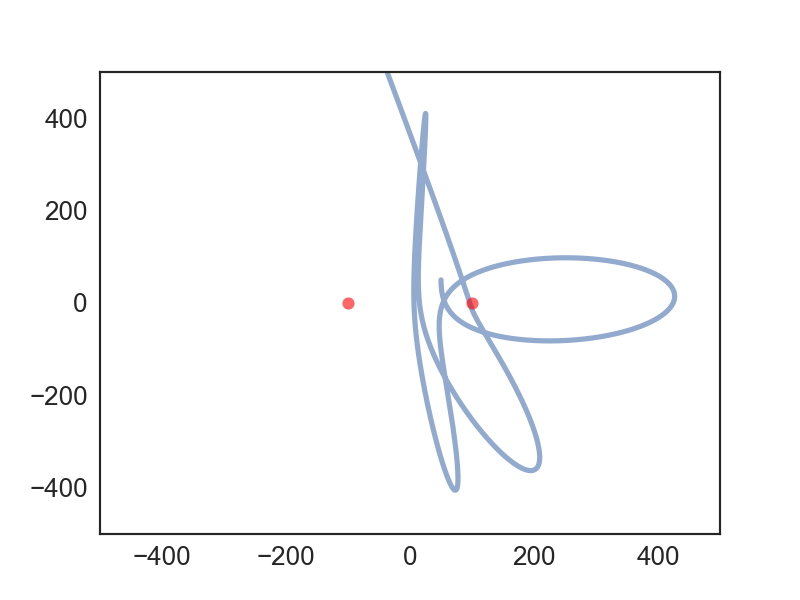

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [12]:
newfig()
plot(system.results.x_p1, system.results.y_p1)
plot(-100, 0, 'ro')
plot(100, 0, 'ro')
decorate(xlim = [-500, 500],
         ylim = [-500, 500])

In [13]:
type(system.results)

modsim.TimeFrame

## Useful Stuff here?

In [14]:
#How to make the animation faster
#The following line takes every 100th row of the original system.results
resampled = system.results.iloc[::100, :]

<IPython.core.display.Javascript object>


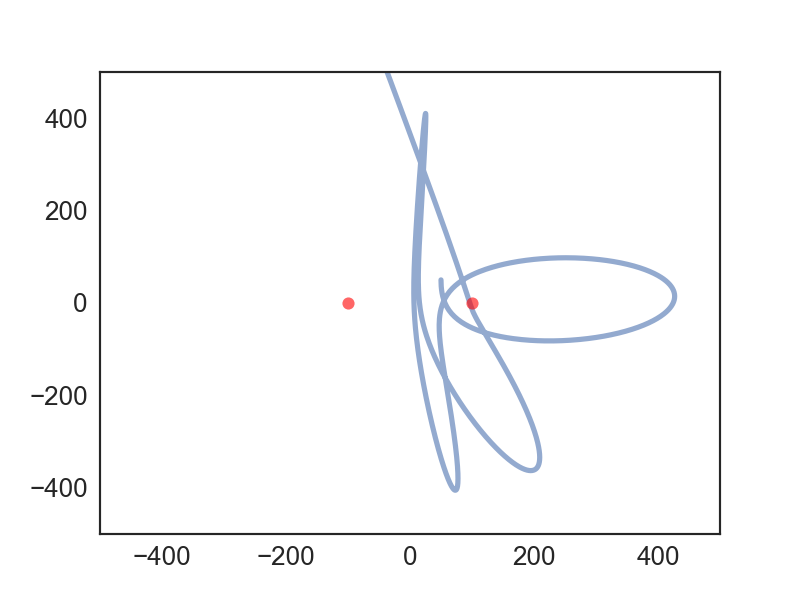

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [15]:
newfig()
plot(resampled.x_p1, resampled.y_p1)
plot(-100, 0, 'ro')
plot(100, 0, 'ro')
decorate(xlim = [-500, 500],
         ylim = [-500, 500])

<IPython.core.display.Javascript object>


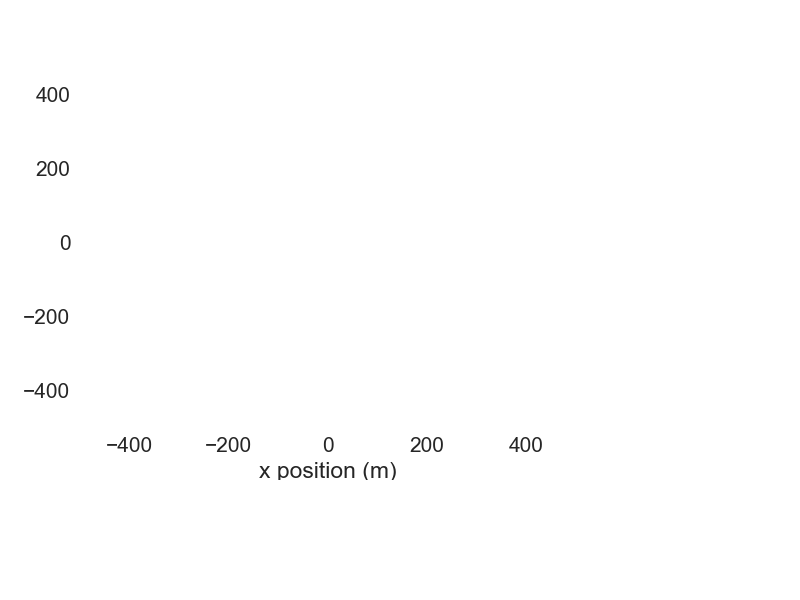

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit

KeyboardInterrupt: 

In [ ]:
newfig()
plot(-100, 0, 'ro')
plot(100, 0, 'ro')
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim = [-500, 500],
         ylim =[-500, 500],
         legend=False)
x_array = []
y_array = []
for x, y in zip(resampled.x_p1, resampled.y_p1):
    x_array.append(x)
    y_array.append(y)
    plot(x_array, y_array, '-o', markersize=1, update=True)
    #plot(x, y, '-o', update=True)
    #sleep(0.00001)